# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

In [77]:
countries = pd.read_csv("countries.csv",decimal=",")

In [78]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [79]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline_ratio     227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones_per_1000     223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [80]:
countries['Country'] = countries['Country'].str.rstrip()
countries['Country'] = countries['Country'].str.lstrip()
countries['Region'] = countries['Region'].str.rstrip()
countries['Region'] = countries['Region'].str.lstrip()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [97]:
def q1():
    regions = countries['Region'].sort_values().unique()
    return list(regions)
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

int64
23


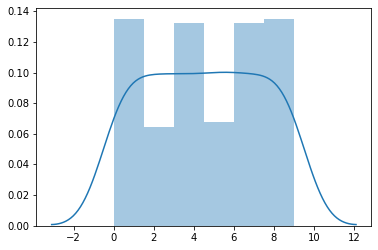

In [82]:
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")

discretizer.fit(countries[["Pop_density"]])

score_bins = discretizer.transform(countries[["Pop_density"]]).astype(int)

sns.distplot(score_bins)

print(score_bins.dtype)
print(np.sum(score_bins==9).astype(int))


In [83]:
def q2():
    return np.sum(score_bins==9).astype(int)
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [98]:
def q3():
    region_unique = len(countries.Region.unique())
    climate_unique = len(countries.Climate.unique())
    return region_unique + climate_unique
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [85]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [95]:
def q4():
    transformed_countries = countries.copy()
    pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("standard", StandardScaler())])
        
    pipe.fit(transformed_countries.iloc[:,2:])
    data_transformed = pipe.transform([test_country[2:]])
    return round(data_transformed[0, transformed_countries.columns.get_loc("Arable") - 2],3)
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

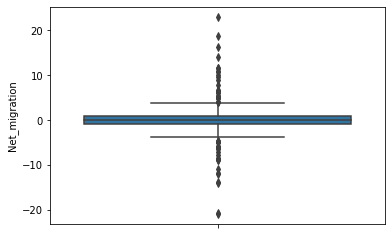

In [89]:
sns.boxplot(countries.Net_migration, orient="vertical")

In [94]:
def q5():
    outlier_net_migration = countries.Net_migration.copy()
    q1 = outlier_net_migration.quantile(0.25)
    q3 = outlier_net_migration.quantile(0.75)
    iqr = q3 - q1

    min_lim = q1 - 1.5 * iqr
    max_lim = q3 + 1.5 * iqr

    outliers_abaixo = len(outlier_net_migration[outlier_net_migration< min_lim])
    outliers_acima = len(outlier_net_migration[outlier_net_migration> max_lim])
    return outliers_abaixo,outliers_acima,False
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [92]:
def q6():
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    # \"Vectorizando\" o data set"
    counter = CountVectorizer()
    freq = counter.fit_transform(newsgroup.data)
    # Recebendo o vocabulário\n",
    words = dict(counter.vocabulary_.items())
    # Retornando a soma.
    return(int(freq[:,words['phone']].sum()))
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [93]:
def q7():
    # Criando o data set
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    #Vectorizando o data set
    Tfid = TfidfVectorizer()
    freq = Tfid.fit_transform(newsgroup.data)
    # Retornando o idf
    return(round(float(freq[:,Tfid.vocabulary_['phone']].sum()),3))
q7()

8.888